In [1]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
base_path = 'C:/Hrushi/tri_nit_24/Japan/train'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44","D50"]

In [3]:
# the number of total images and total labels.
cls_names = []
total_images = 0

file_list = [filename for filename in os.listdir(base_path + '/annotations/xmls/') if not filename.startswith('.')]

for file in file_list:
    total_images = total_images + 1
    if file =='.DS_Store':
        pass
    else:
        infile_xml = open(base_path + '/annotations/xmls/' +file)
        tree = ElementTree.parse(infile_xml)
        root = tree.getroot()
        for obj in root.iter('object'):
            cls_name = obj.find('name').text
            cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：10506
# of labels：24754


D00 : 4049
D01 : 0
D10 : 3979
D11 : 0
D20 : 6199
D40 : 2243
D43 : 736
D44 : 3995
D50 : 3553


<Axes: >

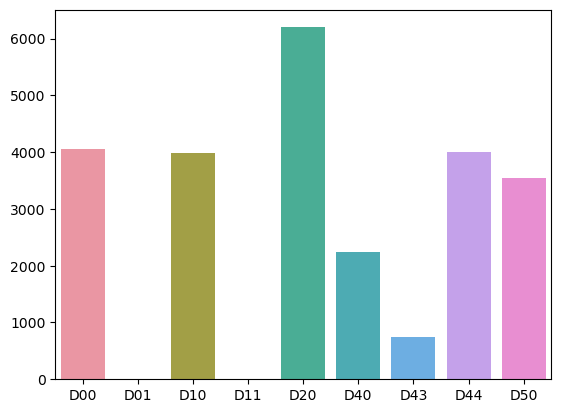

In [4]:
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(x=damageTypes, y=cls_count)

In [5]:
import cv2
import random
import time

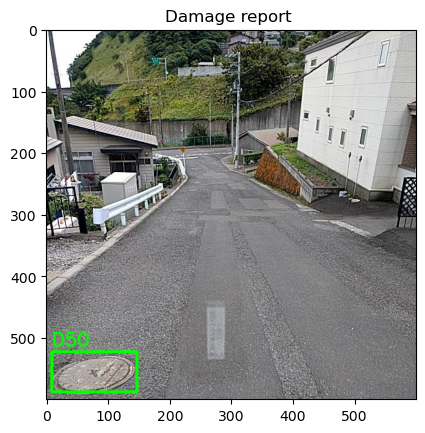

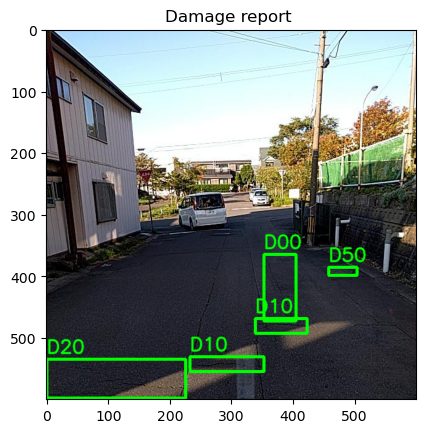

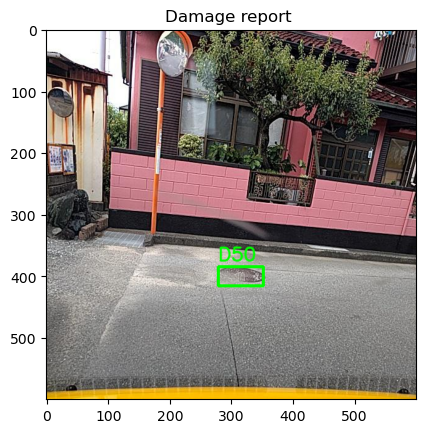

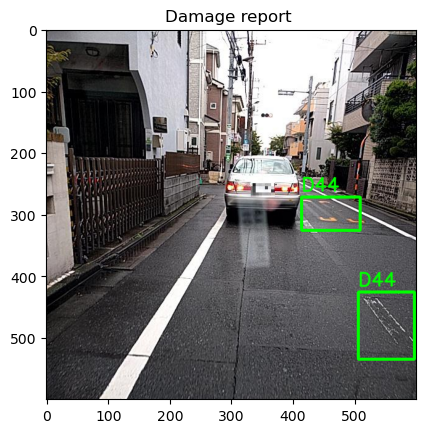

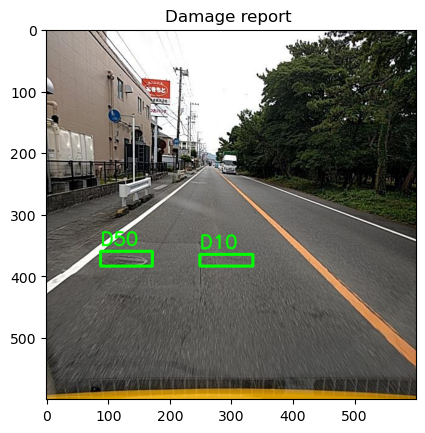

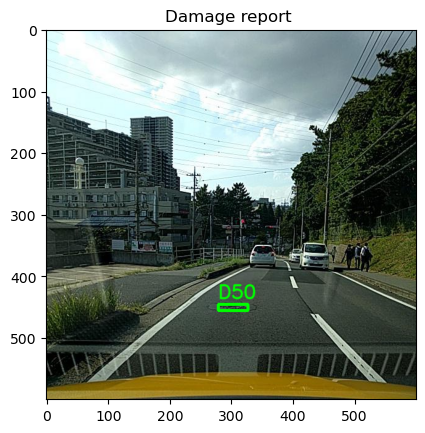

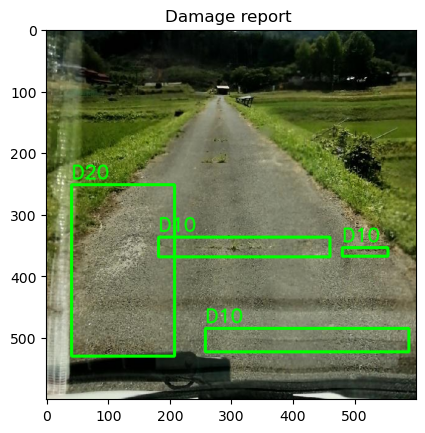

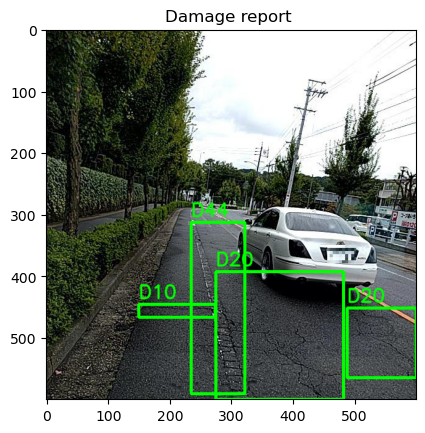

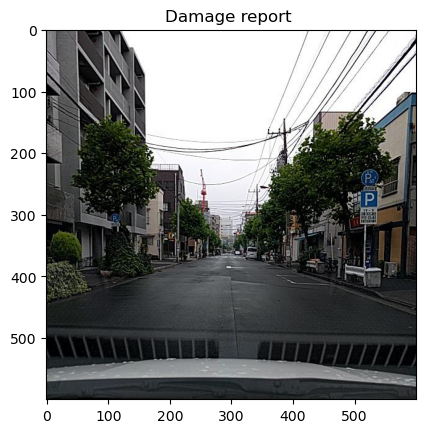

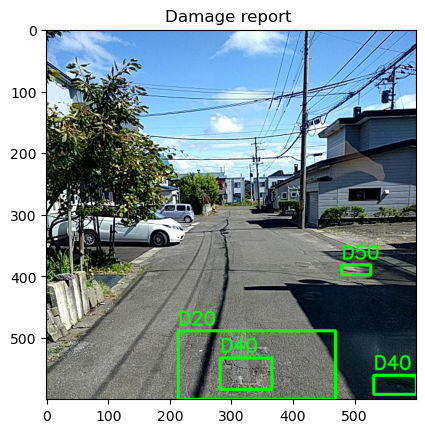

In [8]:
from xml.etree import ElementTree
import os
import random
import cv2
import matplotlib.pyplot as plt

def draw_images(image_file, base_path):
    img = cv2.imread(os.path.join(base_path, 'images', image_file.split('.')[0] + '.jpg'))
    
    infile_xml = open(os.path.join(base_path, 'annotations/xmls', image_file))
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img, cls_name, (xmin, ymin-10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)
    return img

# Assuming damageTypes is defined elsewhere in your code
tmp = []
xmls_dir = os.path.join(base_path, 'annotations/xmls')
for filename in os.listdir(xmls_dir):
    if filename.endswith('.xml'):
        tmp.append(filename)
        
random.shuffle(tmp)
for image in tmp[0:10]:  # Process only the first 10 images
    img = draw_images(image, base_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Damage report ')
    plt.show()